## Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv("supplier_risk_dataset.csv")
data

,product_id,historical_demand,seasonality_index,market_index,weather_index,geo_political_risk_score,supplier_score,delivery_delay_days,news_sentiment,shipment_anomaly_score,...,geopolitical_risk_supplier,contract_compliance,quality_issues,lead_time_variability,supplier_risk_score,combined_supplier_risk,weather_score_scaled,combined_weather,geopolitical_risk_supplier_scaled,combined_geopolitical_risk
0,P003,541,1.054668,1.276376,1.076857,0.875905,0.269630,5,-2.050800,0.356984,...,0,0.986759,0,2.466135,0.769556,0.519593,0.666667,0.871762,0.0,0.437952
1,P004,725,1.045573,0.818155,0.963982,0.905299,0.819677,1,-0.682311,0.512688,...,0,0.962715,0,4.316410,0.737586,0.778631,0.333333,0.648658,0.0,0.452649
2,P001,614,0.826661,1.270858,0.618709,0.492957,0.999350,1,-1.330809,0.675747,...,0,0.852450,0,0.469881,0.507224,0.753287,1.000000,0.809355,0.0,0.246478
3,P003,430,1.007363,1.296892,1.480568,0.330156,0.211431,2,0.234244,0.960252,...,0,0.932826,1,0.346103,0.585260,0.398346,0.666667,1.073617,0.0,0.165078
4,P003,392,0.860068,1.127034,0.714696,0.106801,0.265171,1,-0.421609,0.253669,...,0,0.990192,0,1.077650,0.529172,0.397172,0.000000,0.357348,0.0,0.053400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P001,441,1.137460,0.896077,0.687124,0.405197,0.481900,4,-0.135891,0.528686,...,0,0.980411,0,0.498090,0.599013,0.540457,1.000000,0.843562,0.0,0.202599
996,P001,758,1.192477,0.706487,1.055550,0.596044,0.503134,3,0.148498,0.927969,...,2,0.980182,0,0.625684,1.083123,0.793128,1.000000,1.027775,1.0,0.798022
997,P004,427,1.117257,1.195931,0.791361,0.107451,0.315936,4,0.470876,0.428751,...,0,0.986158,0,1.362616,0.691622,0.503779,1.000000,0.895681,0.0,0.053725
998,P004,589,1.141514,1.180588,0.917395,0.016913,0.729240,3,0.362969,0.869812,...,2,0.996171,1,0.944193,0.995036,0.862138,0.666667,0.792031,1.0,0.508456


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   product_id                         1000 non-null   object 
 1   historical_demand                  1000 non-null   int64  
 2   seasonality_index                  1000 non-null   float64
 3   market_index                       1000 non-null   float64
 4   weather_index                      1000 non-null   float64
 5   geo_political_risk_score           1000 non-null   float64
 6   supplier_score                     1000 non-null   float64
 7   delivery_delay_days                1000 non-null   int64  
 8   news_sentiment                     1000 non-null   float64
 9   shipment_anomaly_score             1000 non-null   float64
 10  price_spike_percentage             1000 non-null   float64
 11  traffic_index                      1000 non-null   float6

#  1. Predictive Risk Analytics
- **Goal:** Predict future demand(historical_demand)

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


**EDA**

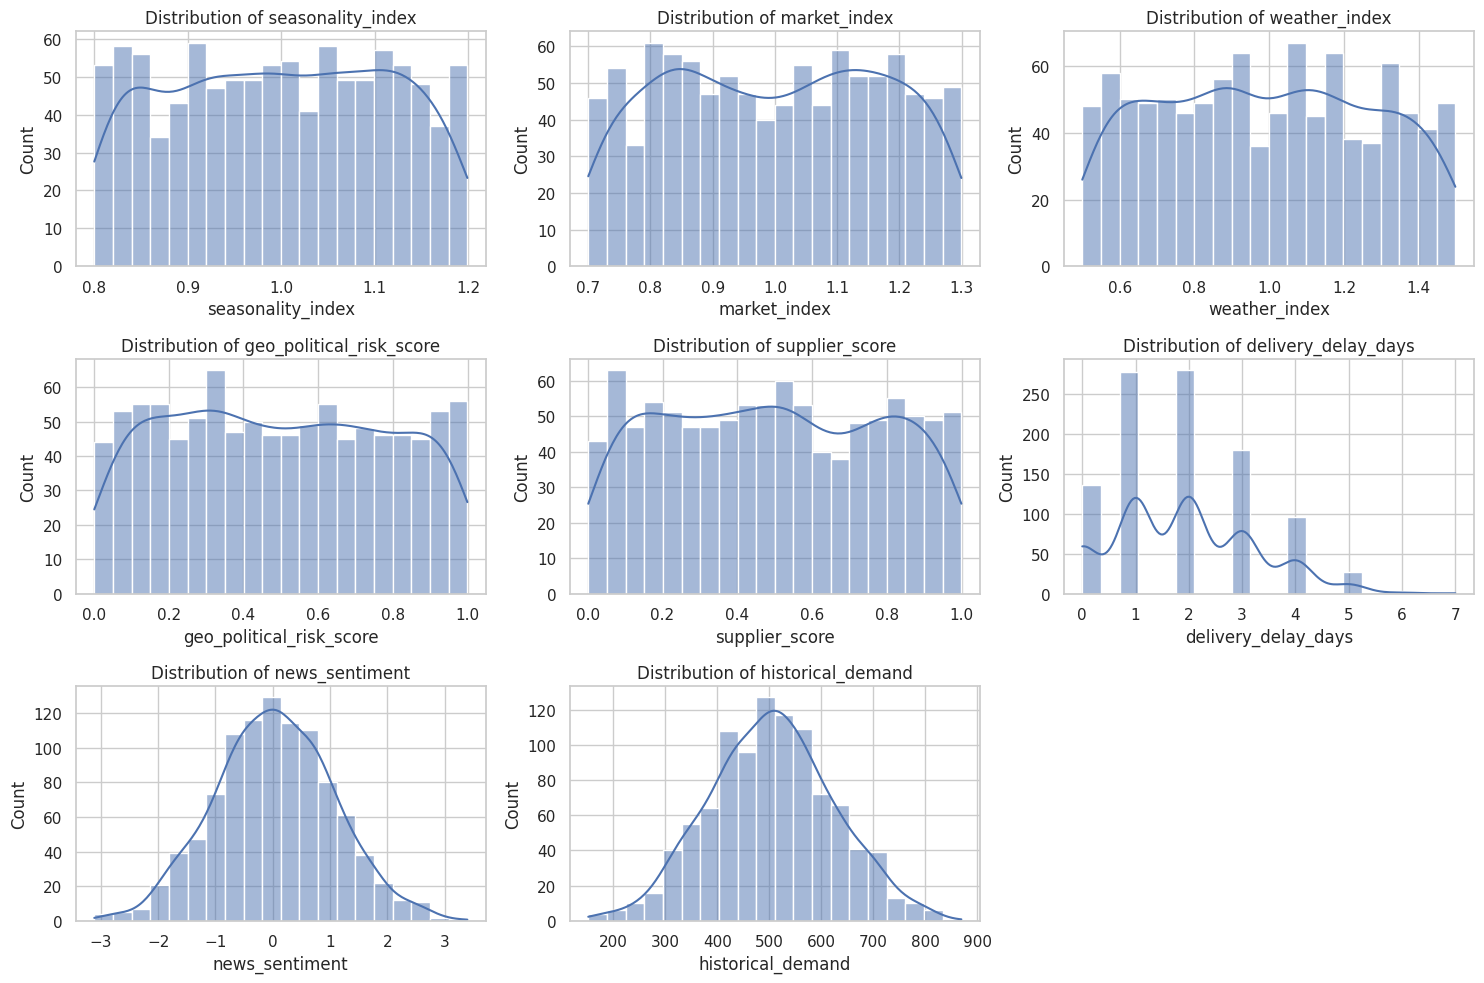

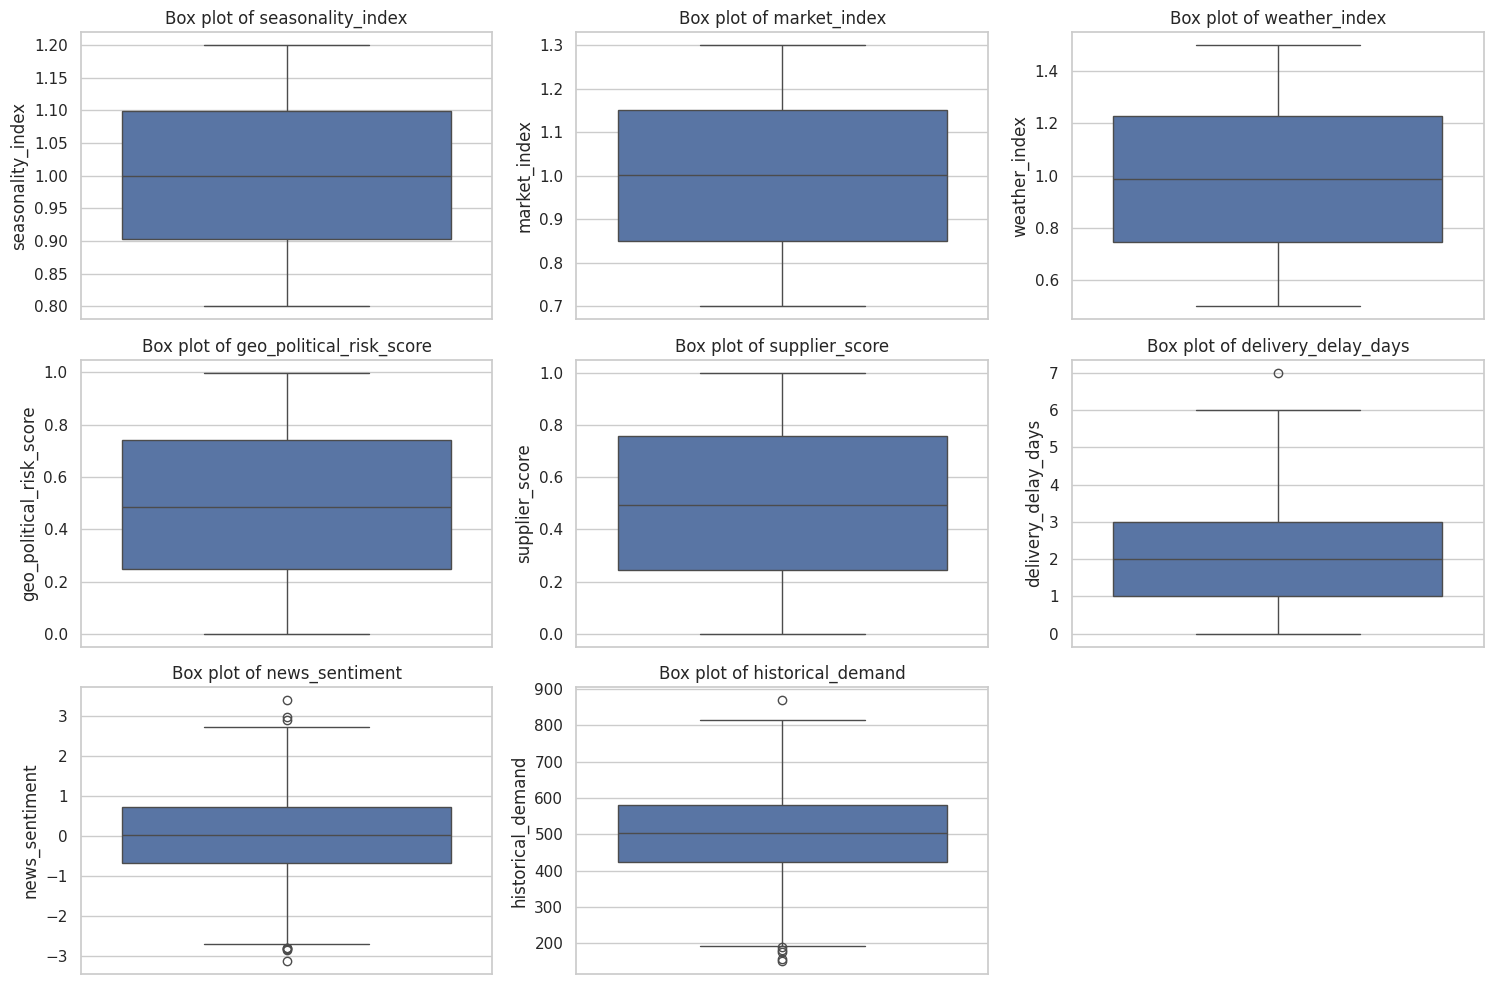

In [4]:
sns.set(style= "whitegrid")
numerical_columns = ["seasonality_index", "market_index", "weather_index",
    "geo_political_risk_score", "supplier_score", "delivery_delay_days",
    "news_sentiment", "historical_demand"]

#Histograms
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde = True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

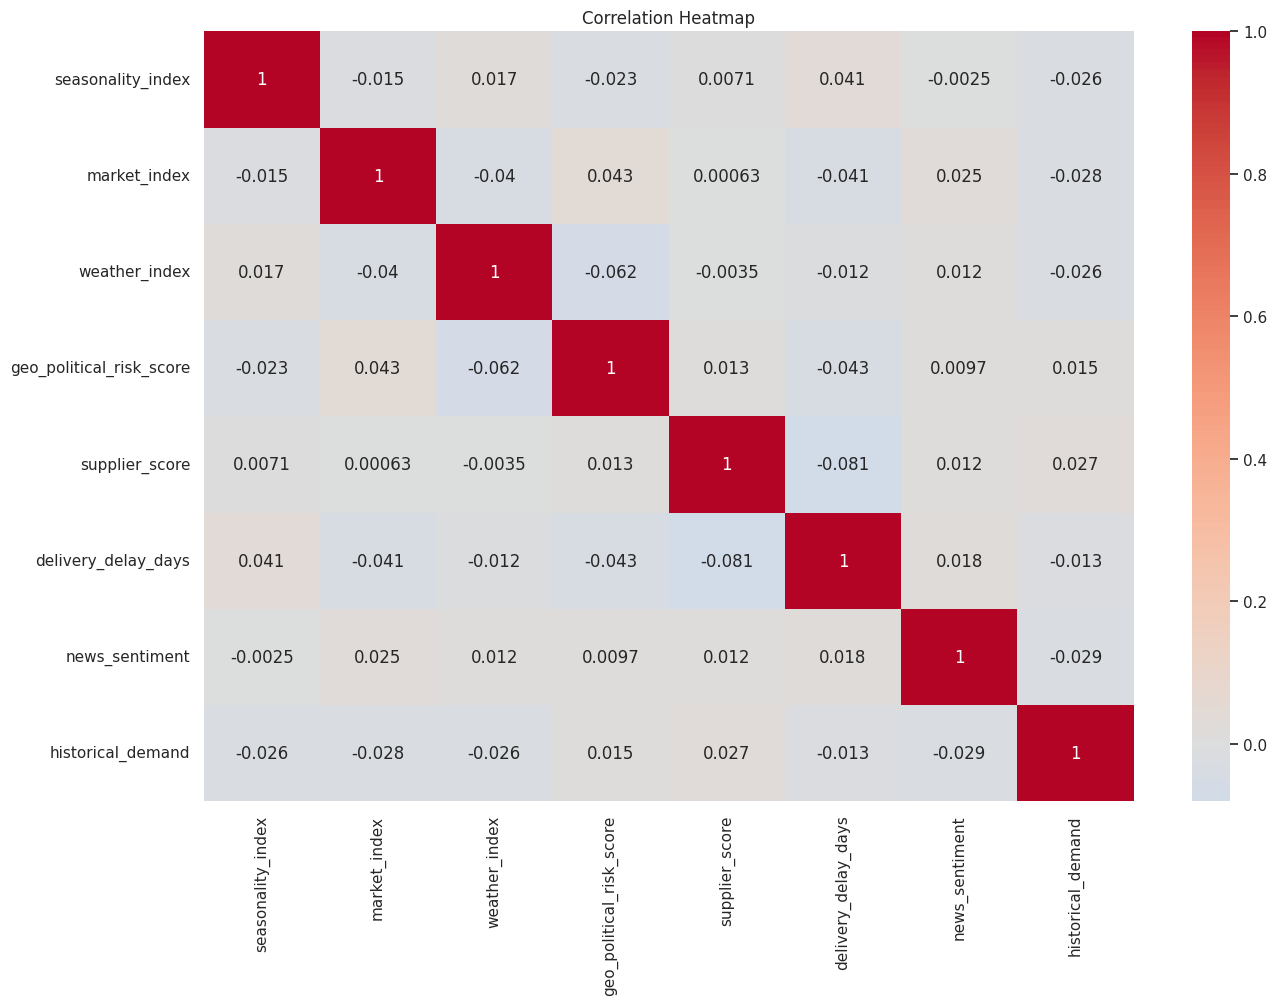

In [5]:
# Correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', center = 0 )
plt.title('Correlation Heatmap')

**Demand Prediction**

In [6]:
features= [
    "seasonality_index", "market_index", "weather_index",
    "geo_political_risk_score", "supplier_score", "delivery_delay_days",
    "news_sentiment"
]

X = data[features]
target = data["historical_demand"]

# Split the dataset
xtrain, xtest, ytrain, ytest= train_test_split(X, target, test_size=0.3, random_state= 42)

#Normalize the dataset
nm = MinMaxScaler()
xtrain_scaled = nm.fit_transform(xtrain)
xtest_scaled = nm.transform(xtest)


**Train fit and evaluate the models**

In [7]:
models = [
    LinearRegression(fit_intercept=True),
    MLPRegressor(hidden_layer_sizes = (11, 11, 11),max_iter = 400),
    XGBRegressor(),
    RandomForestRegressor(n_estimators=100, random_state=42)
          ]

for i in range(4):
    models[i].fit(xtrain_scaled, ytrain)
    y_pred = models[i].predict(xtest_scaled)
    print(f"\n-----{models[i]}------")
    print("MAE", mean_absolute_error(ytest, y_pred))
    print("MSE", mean_squared_error(ytest, y_pred))
    print("R2", format(r2_score(ytest, y_pred)))



-----LinearRegression()------
MAE 93.86099017757496
MSE 13396.141564047395
R2 -0.015711843917038726

-----MLPRegressor(hidden_layer_sizes=(11, 11, 11), max_iter=400)------
MAE 104.24959242781324
MSE 16777.468276703017
R2 -0.2720881724126092

-----XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)------

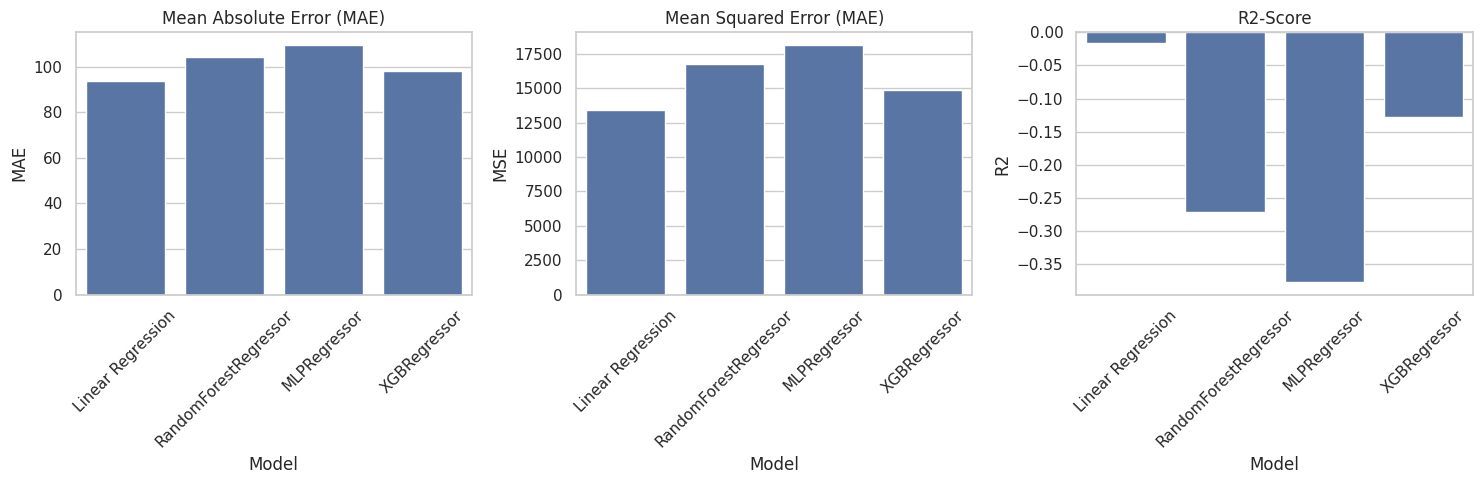

In [8]:
mae_list = []
mse_list = []
r2_list = []
model_names = ['Linear Regression', 'RandomForestRegressor', 'MLPRegressor', 'XGBRegressor']

#calculate performance metrics for each model
for i in range(4):
    ypred = models[i].predict(xtest_scaled)
    mae_list.append(mean_absolute_error(ytest, ypred))
    mse_list.append(mean_squared_error(ytest, ypred))
    r2_list.append(r2_score(ytest, ypred))

#Dtaframe to hold performance metrics
perf_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_list,
    'MSE': mse_list,
    'R2': r2_list
})

#Plot
plt.figure(figsize = (15, 5))

#MAE
plt.subplot(1, 3, 1)
sns.barplot(x = 'Model', y = 'MAE', data = perf_df)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation = 45)

#MSE
plt.subplot(1, 3, 2)
sns.barplot(x = 'Model', y = 'MSE', data = perf_df)
plt.title('Mean Squared Error (MAE)')
plt.xticks(rotation = 45)

#R2
#MAE
plt.subplot(1, 3, 3)
sns.barplot(x = 'Model', y = 'R2', data = perf_df)
plt.title('R2-Score')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [9]:
# Sample predictions using the Linear Regression model
linear_regression_model = models[0]
sample_predictions = linear_regression_model.predict(xtest_scaled[:10])  # Predict for the first 10 samples

# Display the predictions alongside the actual values
sample_results = pd.DataFrame({
    'Actual': ytest[:10].values,
    'Predicted': sample_predictions
})

sample_results

,Actual,Predicted
0,589,508.291587
1,362,508.073486
2,536,499.965840
3,578,514.000880
4,581,511.244248
5,456,508.196773
6,749,514.827277
7,401,499.886220
8,353,513.351939
9,420,492.381712


#  2. Real-time Disruption Detection
- **Goal:** Detect unusual supply chain events (e.g., sudden price spikes, late deliveries, or negative sentiment) using unsupervised ML.

In [10]:
from sklearn.ensemble import IsolationForest

#Select relevant features
disruption_features = [
    "shipment_anomaly_score", "price_spike_percentage",
    "news_sentiment", "geo_political_risk_score", "delivery_delay_days"
]

x_disruption = data[disruption_features]
x_disruption

,shipment_anomaly_score,price_spike_percentage,news_sentiment,geo_political_risk_score,delivery_delay_days
0,0.356984,19.375630,-2.050800,0.875905,5
1,0.512688,16.073720,-0.682311,0.905299,1
2,0.675747,1.995949,-1.330809,0.492957,1
3,0.960252,10.854437,0.234244,0.330156,2
4,0.253669,9.406606,-0.421609,0.106801,1
...,...,...,...,...,...
995,0.528686,0.050708,-0.135891,0.405197,4
996,0.927969,5.842340,0.148498,0.596044,3
997,0.428751,19.697049,0.470876,0.107451,4
998,0.869812,16.852234,0.362969,0.016913,3


**EDA**

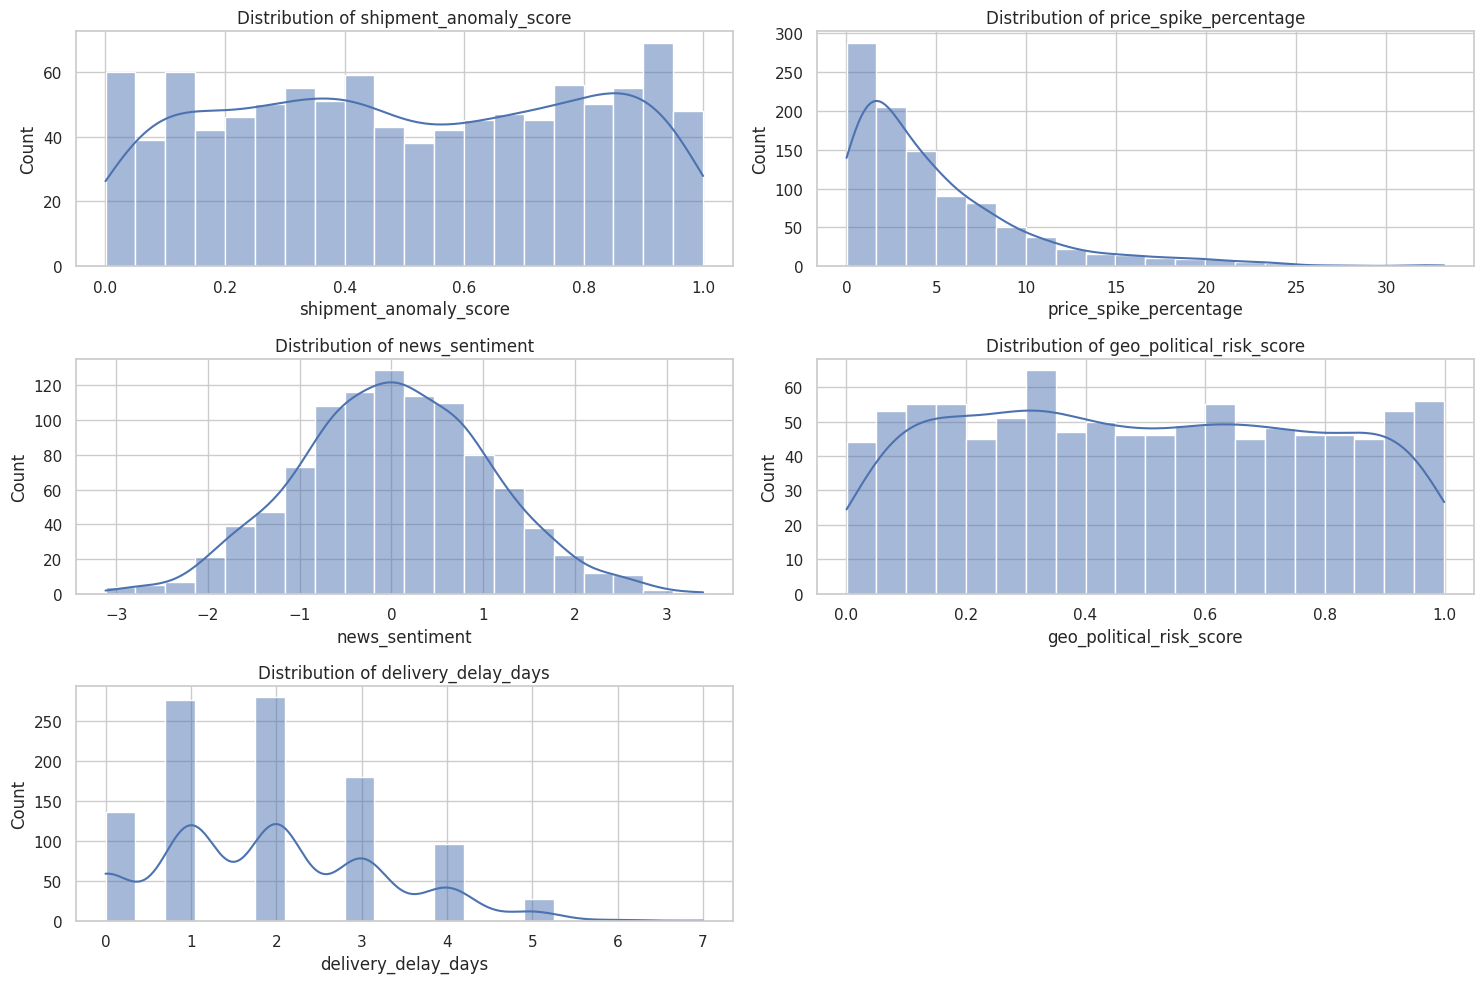

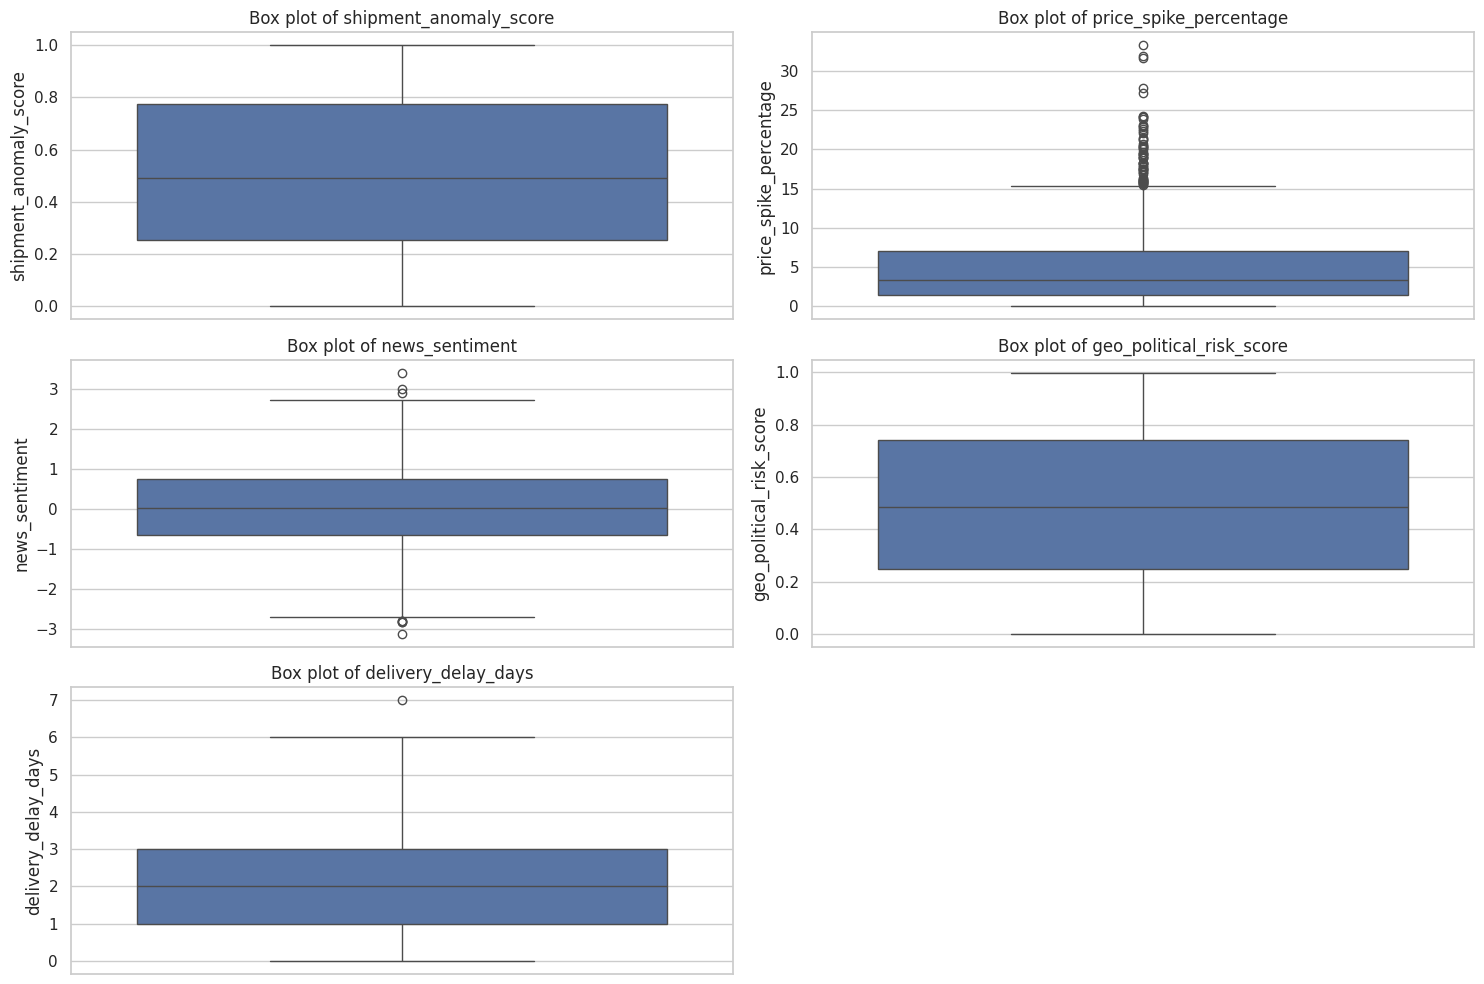

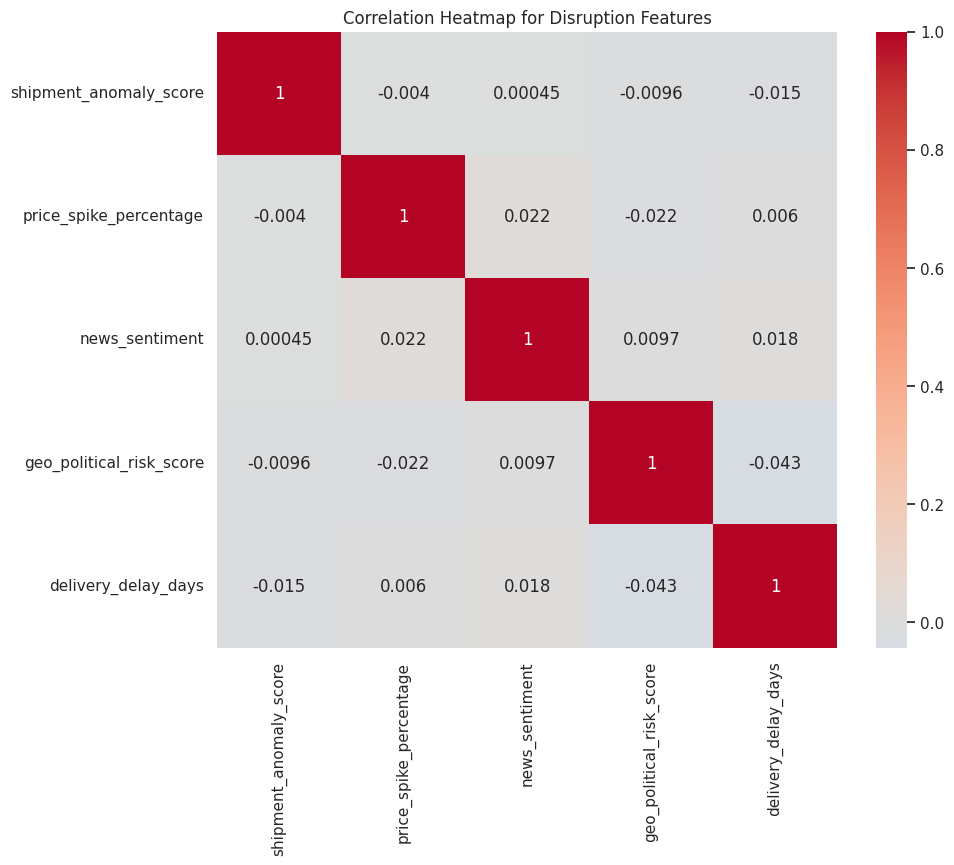

In [11]:
# Set style for seaborn
sns.set(style="whitegrid")

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(disruption_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(disruption_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix_disruption = data[disruption_features].corr()
sns.heatmap(corr_matrix_disruption, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Disruption Features')
plt.show()

**Train Isolation Forest(Disruption detection)**

In [12]:
#scale the features
x_disruption = nm.fit_transform(x_disruption)
disrupt_scaled = pd.DataFrame(x_disruption, columns = disruption_features)
disrupt_scaled

,shipment_anomaly_score,price_spike_percentage,news_sentiment,geo_political_risk_score,delivery_delay_days
0,0.357120,0.583157,0.163605,0.876847,0.714286
1,0.512952,0.483747,0.373664,0.906305,0.142857
2,0.676145,0.059910,0.274122,0.493074,0.142857
3,0.960885,0.326611,0.514353,0.329922,0.285714
4,0.253720,0.283021,0.413682,0.106085,0.142857
...,...,...,...,...,...
995,0.528963,0.001345,0.457538,0.405125,0.571429
996,0.928575,0.175713,0.501191,0.596383,0.428571
997,0.428947,0.592834,0.550675,0.106737,0.571429
998,0.870371,0.507185,0.534112,0.016004,0.428571


In [13]:
# Train isolation forest
isolation_forest = IsolationForest(contamination = 0.05, random_state = 42)
data["anomaly"] =  isolation_forest.fit_predict(disrupt_scaled)

# Anomaly labels: -1 = anomaly, 1=normal
data['anomaly_flag'] = data['anomaly'].apply(lambda x: 'Anomaly' if x== -1 else "Normal")
data['anomaly_flag']

,anomaly_flag
0,Anomaly
1,Normal
2,Normal
3,Normal
4,Normal
...,...
995,Normal
996,Normal
997,Anomaly
998,Normal


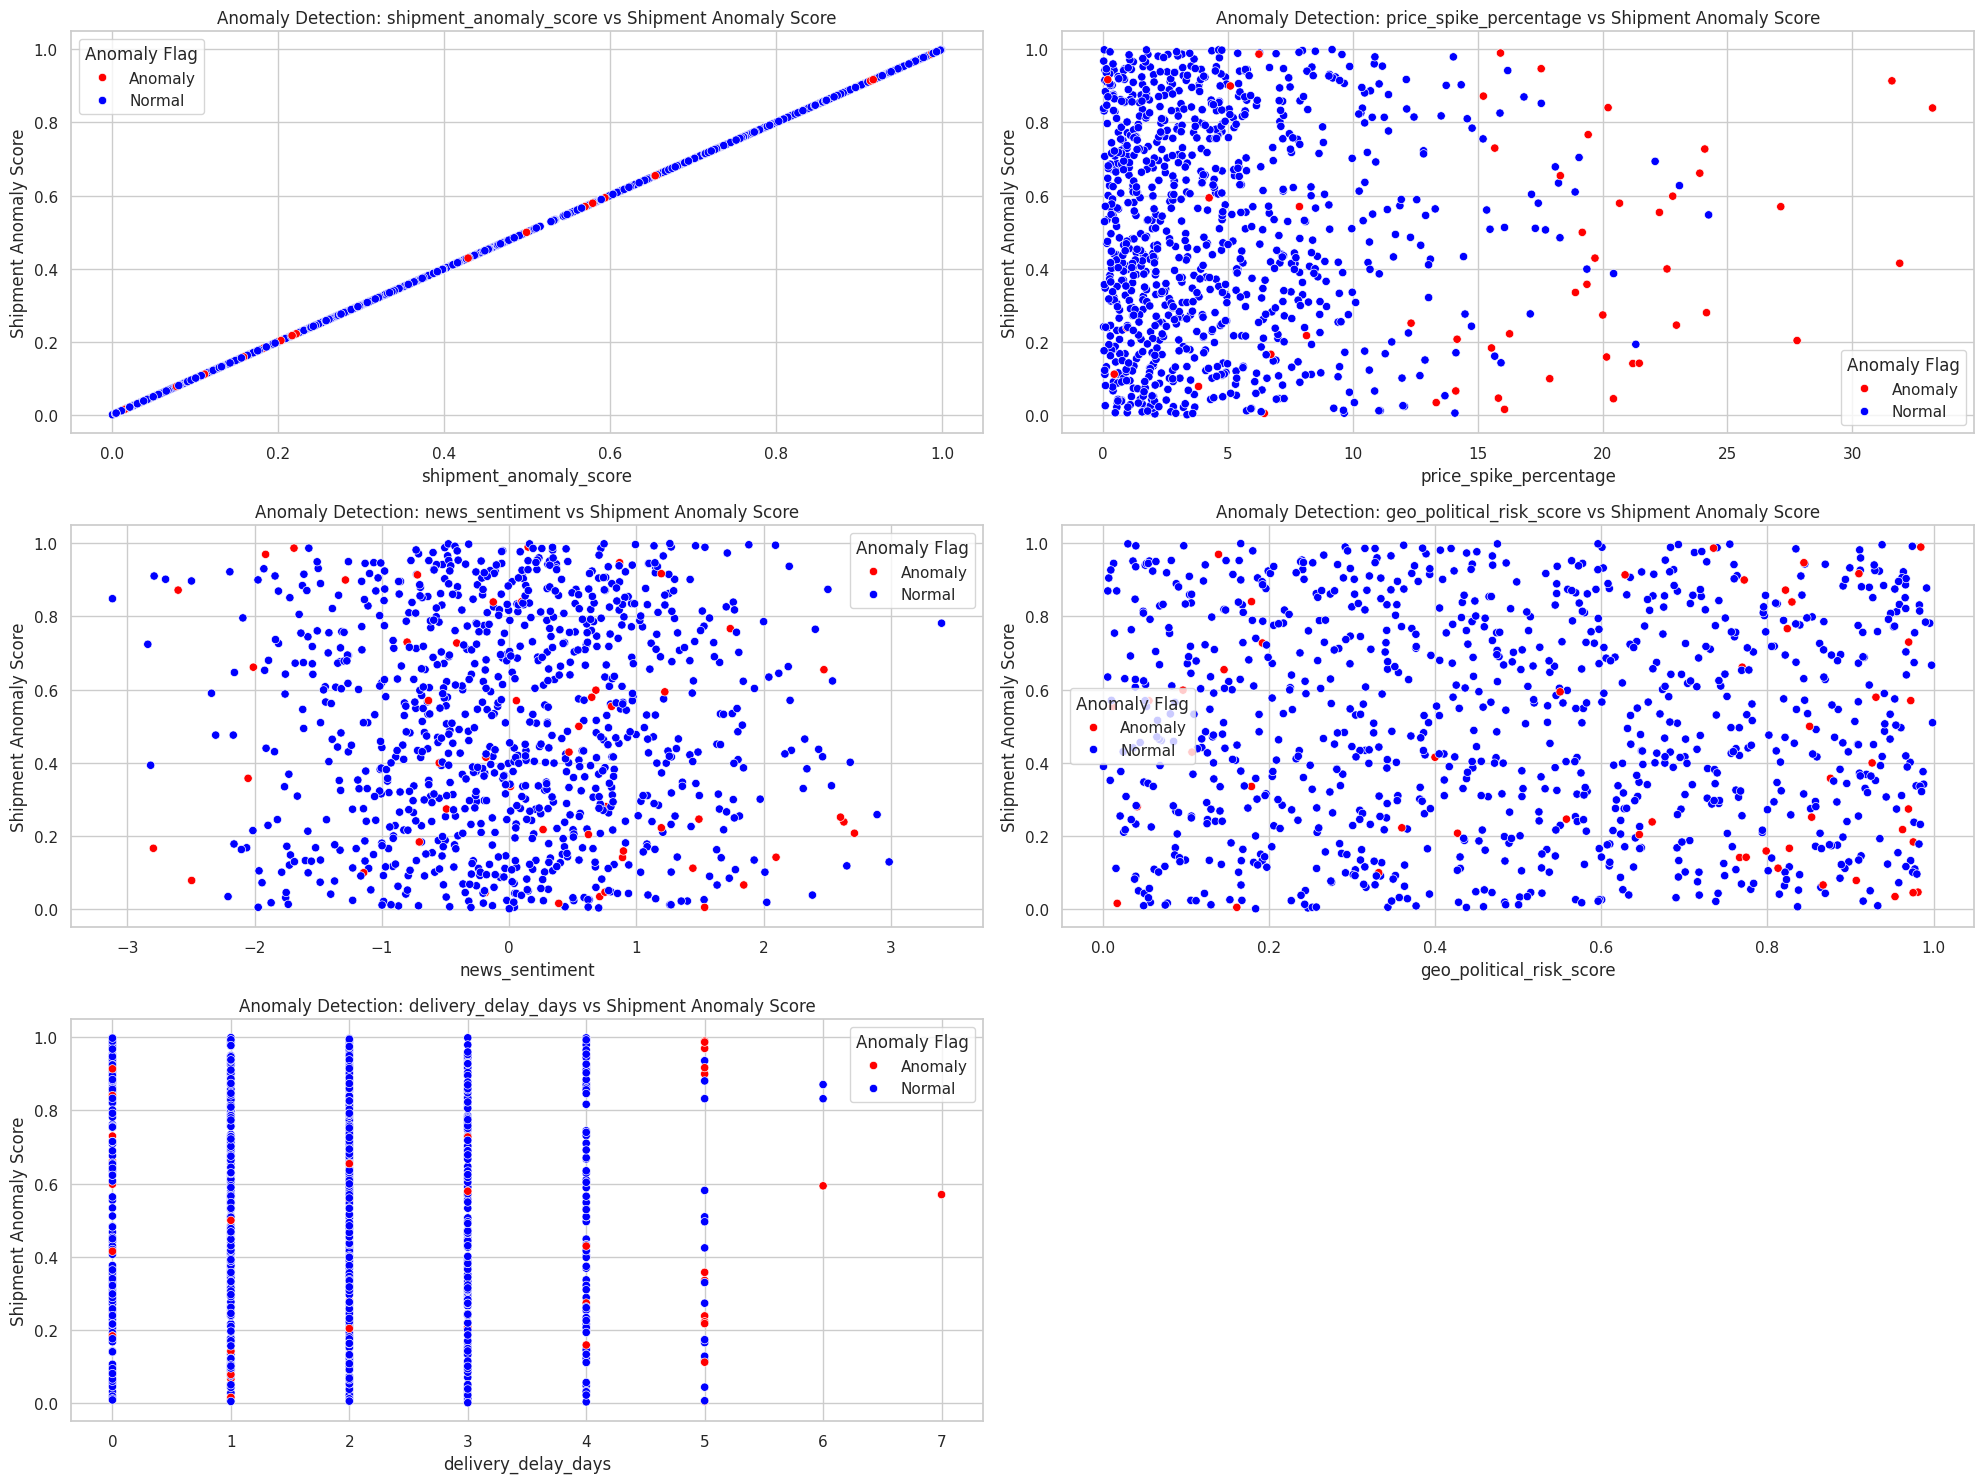

In [14]:
# Visualize anomaly detection results for all features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(disruption_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(
        data=data,
        x=feature,
        y="shipment_anomaly_score",
        hue="anomaly_flag",
        palette={"Normal": "blue", "Anomaly": "red"}
    )
    plt.title(f"Anomaly Detection: {feature} vs Shipment Anomaly Score")
    plt.xlabel(feature)
    plt.ylabel("Shipment Anomaly Score")
    plt.legend(title="Anomaly Flag")
plt.tight_layout()
plt.show()

To deal with the detected anomalies, you can take one of the following approaches depending on your use case:

1. **Remove Anomalies**: If anomalies are considered noise and not relevant to your analysis, you can filter them out.
    ```python
    # Filter out anomalies
    data_cleaned = data[data['anomaly_flag'] == 'Normal']
    ```

2. **Analyze Anomalies Separately**: If anomalies are of interest, you can create a separate dataset for further analysis.
    ```python
    # Separate anomalies
    anomalies = data[data['anomaly_flag'] == 'Anomaly']
    ```

3. **Replace Anomalies**: Replace anomalies with mean, median, or other imputed values.
    ```python
    # Replace anomalies with median values
    for col in disruption_features:
         median_value = data[data['anomaly_flag'] == 'Normal'][col].median()
         data.loc[data['anomaly_flag'] == 'Anomaly', col] = median_value
    ```

4. **Use Robust Models**: Use models that are less sensitive to anomalies, such as tree-based models or robust regression techniques.


#  3. Dynamic Route Optimization
- **Goal:** Use Reinforcement Learning to find the most efficient delivery route in the face of disruptions like:
    - Traffic delays
    - Fuel costs
    - Road blocks
    - Weather hazards

**Create The RL Environment**

In [15]:
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import pandas as pd
import random

class RouteEnv(Env):
    def __init__(self, data):
        super(RouteEnv, self).__init__()
        self.data = data.reset_index(drop=True)
        self.current_step = 0
        self.action_space = Discrete(4)  # 0: Route A, 1: Route B, 2: Wait, 3: Reroute
        self.observation_space = Box(low=0, high=1, shape=(8,), dtype=np.float32)

    def _get_state(self):
        row = self.data.iloc[self.current_step]
        state = np.array([
            row["traffic_index"],
            row["fuel_cost_per_km"],
            row["shipment_anomaly_score"],
            row["weather_index"],
            row["weather_score_scaled"],
            row["geopolitical_risk_supplier_scaled"],
            row["supplier_risk_score"],
            row["delivery_delay_days"] / 30
        ])
        return np.clip(state, 0, 1)

    def step(self, action):
        row = self.data.iloc[self.current_step]
        fuel_cost = row["fuel_cost_per_km"] * 10
        delay = row["delivery_delay_days"]
        anomaly = row["shipment_anomaly_score"]
        weather = row["weather_score_scaled"]

        if action == 0: reward = - (fuel_cost + delay + anomaly * 10)
        elif action == 1: reward = - (fuel_cost * 1.2 + delay * 0.8 + weather * 5)
        elif action == 2: reward = - (delay + 2)
        else: reward = - (fuel_cost * 1.5 + anomaly * 8 + weather * 3)

        self.current_step += 1
        done = self.current_step >= len(self.data) - 1
        return self._get_state(), reward, done, {}

    def reset(self):
        self.current_step = random.randint(0, len(self.data) - 100)
        return self._get_state()

    def render(self, mode='human'):
        pass


**Train The Agent**

In [20]:
from stable_baselines3 import DQN

# Initialize the environment with the updated class
env = RouteEnv(data)

# Train the DQN agent
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Save your model
model.save("dqn_route_optimizer")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 528       |
|    ep_rew_mean      | -5.85e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4         |
|    fps              | 169       |
|    time_elapsed     | 12        |
|    total_timesteps  | 2110      |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 7.21      |
|    n_updates        | 502       |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 543       |
|    ep_rew_mean      | -4.21e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8         |
|    fps              | 206       |
|    time_elapsed     | 21        |
|    total_timesteps  | 4344      |
| trai

**Evaluate**

In [21]:
obs = env.reset()
total_reward = 0
for _ in range(100):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        break

print("Total reward:", total_reward)

# Analyze the total reward to evaluate the chosen route strategy
if total_reward > -300:
    print("The route optimization strategy performed well.")
else:
    print("The route optimization strategy needs improvement.")

# Example: Save the results for further analysis
results = {
    "Total Reward": total_reward,
    "Observation": obs.tolist()
}
print("Optimization Results:", results)

Total reward: -472.288052048615
The route optimization strategy needs improvement.
Optimization Results: {'Total Reward': np.float64(-472.288052048615), 'Observation': [0.1907172530047453, 0.8456786323875042, 0.0221595355445215, 0.5138621359128601, 0.6666666666666666, 0.0, 0.6863852538238919, 0.1]}


# 4. Deep Learning For Fraud Detection
- **Goal**: Use a Deep Neural Network (DNN) to detect fraudulent transactions using synthetic transactional data.

**Load Dataset**

In [22]:
fraud_data = pd.read_csv("synthetic_fraud_dataset.csv")
fraud_data

,amount,time_of_day,location_distance_km,device_type,transaction_freq,merchant_category,is_foreign,has_prev_fraud,fraud
0,46.926809,22,11.319442,0,10,3,0,0,0
1,301.012143,3,2.726926,1,6,0,0,0,0
2,131.674569,17,10.554182,0,7,2,1,0,0
3,91.294255,4,2.867680,0,19,2,0,0,0
4,16.962487,15,11.791670,1,14,3,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,194.950853,22,9.004754,0,12,3,0,0,0
9996,227.797868,5,10.162131,0,16,0,0,0,0
9997,293.196746,21,8.836133,1,16,3,0,0,0
9998,50.664768,2,11.681693,0,7,4,0,0,0


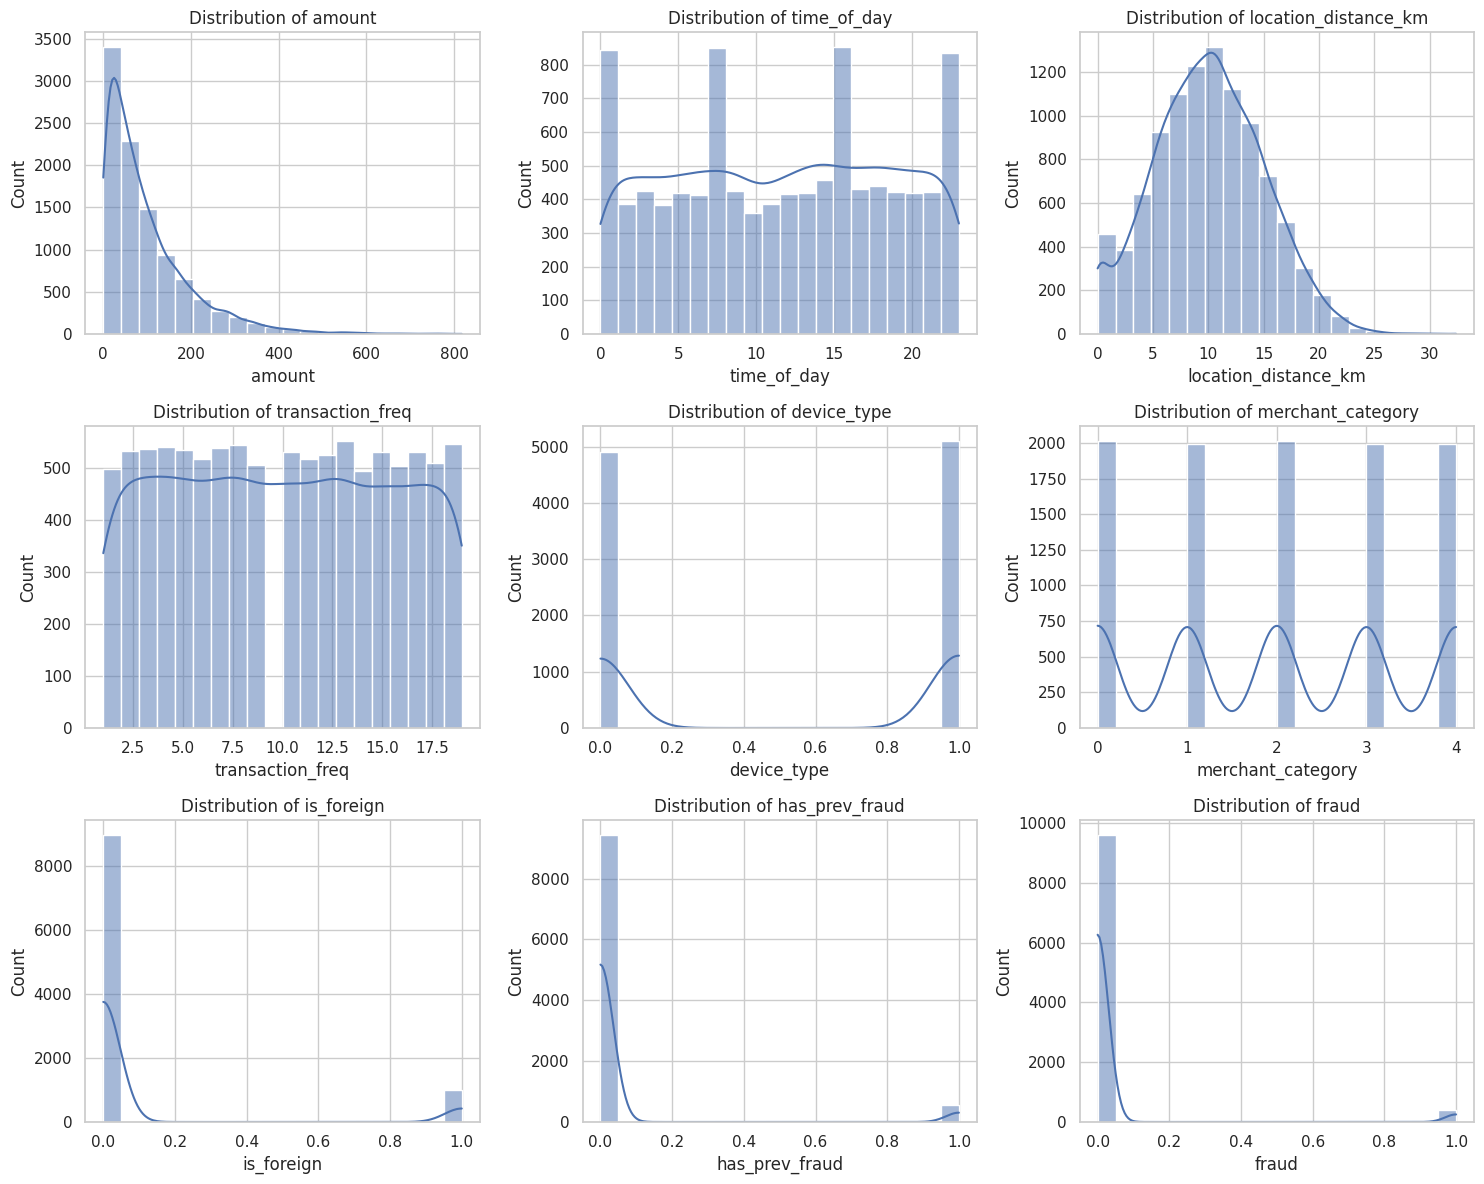

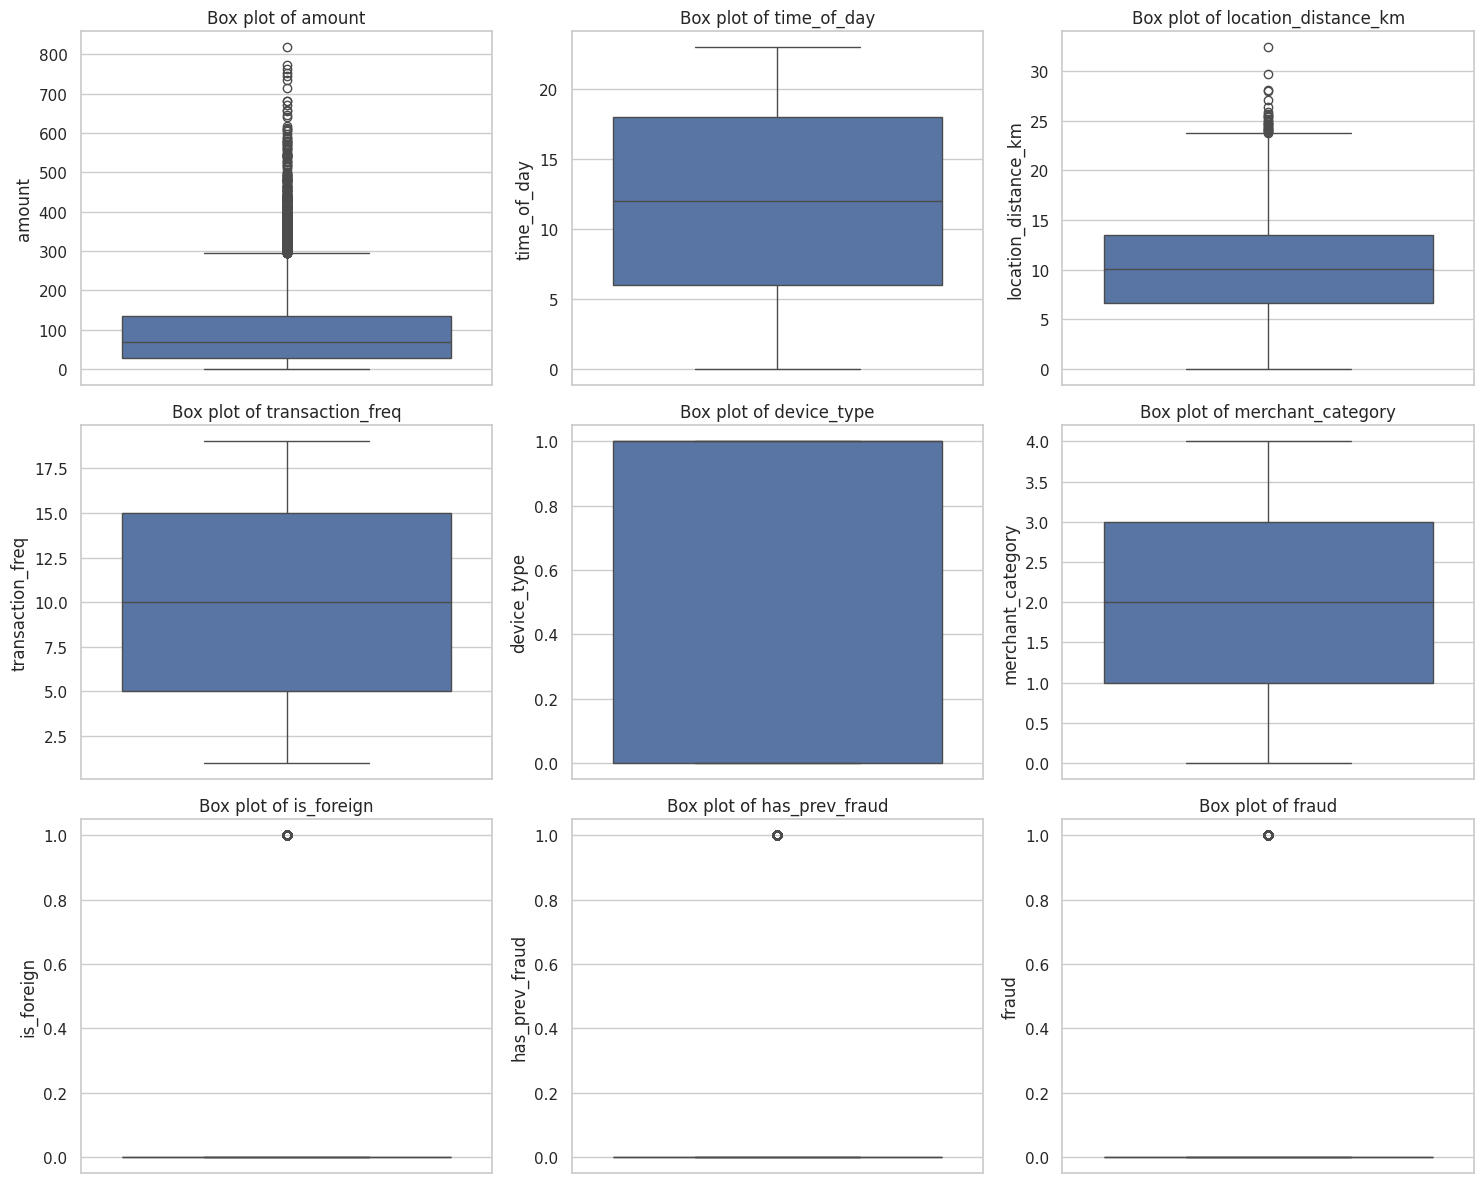

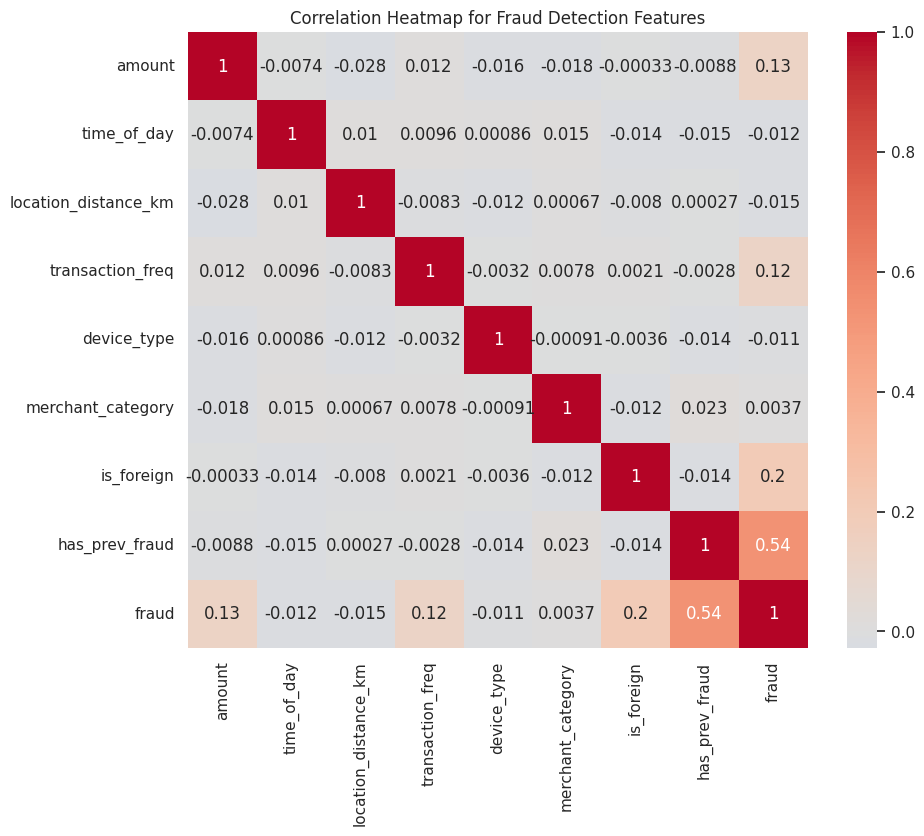

In [23]:
# Set style
sns.set(style="whitegrid")

# List of numerical columns
fraud_numerical_columns = [
    "amount", "time_of_day", "location_distance_km", "transaction_freq",
    "device_type", "merchant_category", "is_foreign", "has_prev_fraud", "fraud"
]

# Histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(fraud_numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(fraud_data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(fraud_numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=fraud_data[col])
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
fraud_corr_matrix = fraud_data[fraud_numerical_columns].corr()
sns.heatmap(fraud_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Fraud Detection Features')
plt.show()


**Build and Train Deep Neural Network**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight

# select features
X = fraud_data.drop("fraud", axis = 1)
y = fraud_data["fraud"]


# Normalize the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

fraud_columns = [
    "amount", "time_of_day", "location_distance_km", "transaction_freq",
    "device_type", "merchant_category", "is_foreign", "has_prev_fraud"
]
df=pd.DataFrame(X_scaled, columns = fraud_columns)
df

,amount,time_of_day,location_distance_km,transaction_freq,device_type,merchant_category,is_foreign,has_prev_fraud
0,-0.521607,1.503345,0.250335,-1.021021,0.002046,0.710717,-0.334813,-0.243331
1,2.086119,-1.241383,-1.497992,0.979412,-0.728834,-1.410405,-0.334813,-0.243331
2,0.348175,0.781048,0.094627,-1.021021,-0.546114,0.003677,2.986743,-0.243331
3,-0.066255,-1.096923,-1.469353,-1.021021,1.646528,0.003677,-0.334813,-0.243331
4,-0.829136,0.492130,0.346420,0.979412,0.732927,0.710717,-0.334813,-0.243331
...,...,...,...,...,...,...,...,...
9995,0.997592,1.503345,-0.220637,-1.021021,0.367487,0.710717,-0.334813,-0.243331
9996,1.334707,-0.952464,0.014856,-1.021021,1.098368,-1.410405,-0.334813,-0.243331
9997,2.005908,1.358886,-0.254946,0.979412,1.098368,0.710717,-0.334813,-0.243331
9998,-0.483244,-1.385842,0.324043,-1.021021,-0.546114,1.417758,-0.334813,-0.243331


In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the fraud class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 9612, 1: 9612})


In [27]:
# split the dataset
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X_resampled, y_resampled, test_size = 0.2, stratify = y_resampled)

#Build DNN model
model = Sequential([
    Dense(128, input_dim = X.shape[1], activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-16)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    Xtrain, Ytrain,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9567 - loss: 0.1600 - val_accuracy: 0.9912 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9957 - loss: 0.0107 - val_accuracy: 0.9964 - val_loss: 0.0099 - learning_rate: 0.0010
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9980 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9974 - val_loss: 0.0118 - learning_rate: 0.0010
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9980 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9984 - val_loss: 0.0073 - learning_rate: 0.0010
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9996 - loss: 0.

In [29]:
# Evaluate the model
test_loss , test_acc = model.evaluate(Xtest, Ytest)
print(f"Test accuracy : {test_acc}")
print(f"Test loss : {test_loss}")


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - loss: 0.0012
Test accuracy : 0.9992197751998901
Test loss : 0.0024147825315594673


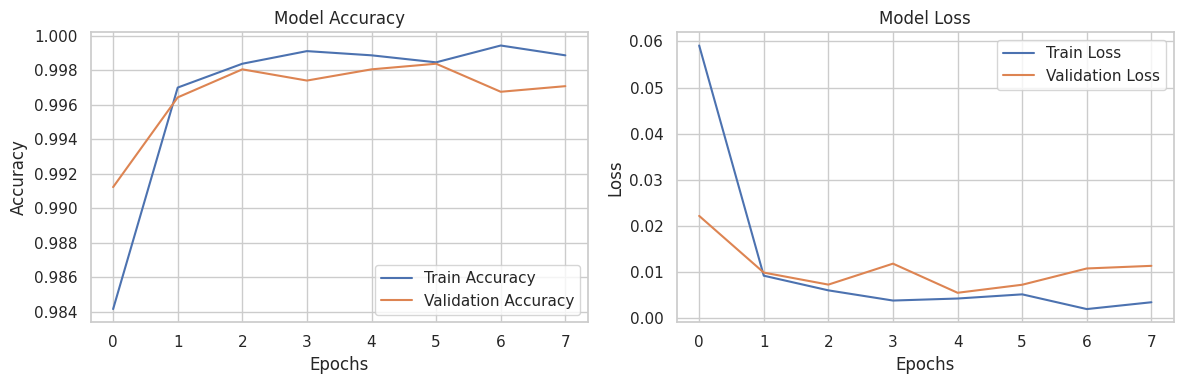

In [30]:
# Plot accuracy and loss
plt.figure(figsize = (12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the plots
plt.tight_layout()
plt.show()

In [31]:
# Sample predictions using the DNN model
sample_dnn_predictions = model.predict(Xtest)  # Predict for the first 10 samples

# Flatten the predictions
sample_dnn_predictions = sample_dnn_predictions.flatten()

# Round the predictions to 7 decimal places
sample_dnn_predictions = np.round(sample_dnn_predictions, 7)

# Display the predictions alongside the actual values
sample_dnn_results = pd.DataFrame({
    'Actual': Ytest.values,
    'Predicted Fraud': sample_dnn_predictions
})

sample_dnn_results

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Actual,Predicted Fraud
0,1,9.990897e-01
1,1,9.999972e-01
2,0,0.000000e+00
3,0,0.000000e+00
4,0,9.600000e-06
...,...,...
3840,1,9.999999e-01
3841,0,8.000000e-07
3842,0,0.000000e+00
3843,0,0.000000e+00
